# Results of different d values

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<Figure size 1332x756 with 0 Axes>

In [25]:
results = pd.read_csv('./d_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','d','num_agents'], as_index=False).mean()
results.head()

,planner,d,num_agents,num_robots,f,active_time,planner_time,damage,num_disabled
0,ClusteringAssignmentPlanner,3,100,16.966667,2.0,120.067294,0.326193,4806.933989,100.0
1,ClusteringAssignmentPlanner,5,100,10.000000,2.0,138.333831,0.282724,5945.851706,100.0
2,ClusteringAssignmentPlanner,10,100,5.000000,2.0,204.587301,0.249107,8831.056797,100.0
3,ClusteringAssignmentPlanner,15,100,4.000000,2.0,243.387370,0.241752,10450.484588,100.0
4,IterativeAssignmentPlanner,3,100,16.966667,2.0,114.139782,0.135819,4102.970713,100.0


In [26]:
num_agents = 100

results = results.loc[results['num_agents']==num_agents]

planners_names = ['StaticLinePlanner', 'TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner',
                  'ClusteringAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* agent speed v is 1
* robot speed fv is 2


### damage as function of d

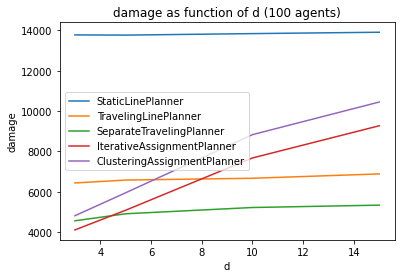

In [27]:
title = f'damage as function of d ({num_agents} agents)'
plt.title(title)
plt.xlabel('d')
plt.ylabel('damage')

for r in planners_results:
    plt.plot(list(r['d']),list(r['damage']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()

### active time as function of d

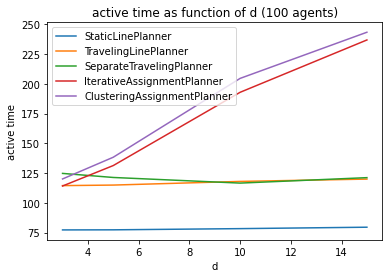

In [28]:
title = f'active time as function of d ({num_agents} agents)'
plt.title(title)
plt.xlabel('d')
plt.ylabel('active time')

for r in planners_results:
    plt.plot(list(r['d']),list(r['active_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### planner time as function of d

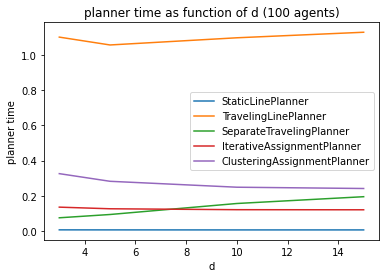

In [29]:
title = f'planner time as function of d ({num_agents} agents)'
plt.title(title)
plt.xlabel('d')
plt.ylabel('planner time')

for r in planners_results:
    plt.plot(list(r['d']),list(r['planner_time']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()


### #disabled as function of d

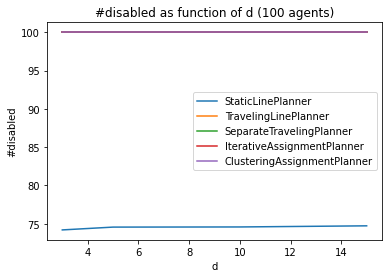

In [30]:
title = f'#disabled as function of d ({num_agents} agents)'
plt.title(title)
plt.xlabel('d')
plt.ylabel('#disabled')

for r in planners_results:
    plt.plot(list(r['d']),list(r['num_disabled']))

plt.legend(planners_names)
# plt.savefig('./plots/'+title+'.png')
plt.show()



